In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
import os
import networkx as nx
from collections import Counter, defaultdict
import EoN
import tqdm

# define path to the project for convenoent relative import
sys.path.append(os.path.dirname(os.getcwd())) 
from source.model_output import SEIRModelOutput, SEIRParams
from source.SEIR_network import SEIRNetworkModel


### Dataset with simple curves

In [5]:
tmax = 150 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 'init_inf_frac', 'alpha']+ \
    [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

In [4]:
network_model = SEIRNetworkModel(10**5)

beta = 0.5 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected

alpha_arr = np.arange(0.2, 1, 0.01) # fraction of initial non-immune array
beta_arr = np.arange(0.1, 1, 0.01) # transmission rate array

print('Dataset size:', len(alpha_arr)*len(beta_arr))

for beta in tqdm.tqdm(beta_arr):
    for alpha in alpha_arr:
        res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=(1-alpha))
        sample = [beta, gamma, delta, init_inf_frac, alpha] + res.daily_incidence
        dataset.loc[len(dataset)] = sample

Dataset size: 7200


  0%|          | 0/90 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [43]:
dataset.to_csv('../data/network_model_dataset_7200.csv')

In [6]:
dataset = pd.read_csv('../data/network_model_dataset_7200.csv')

/var/folders/z9/3mmkvbxj1g5gk4qrms1dj77h0000gn/T/ipykernel_75976/829885633.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=fontsize)


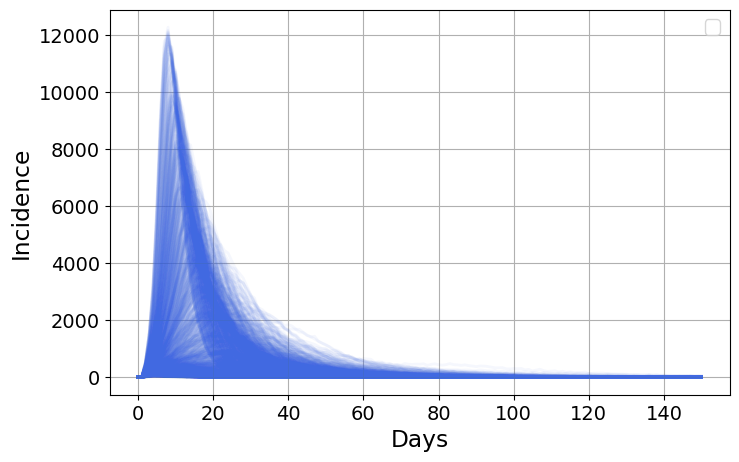

In [10]:
fontsize = 14
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(1, len(dataset), 5):
    ax.plot(dataset.values[i][5:], color='RoyalBlue', alpha=0.05, lw=2)
ax.set_xlabel('Days', fontsize=1.2*fontsize)
ax.set_ylabel('Incidence', fontsize=1.2*fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.legend(fontsize=fontsize)
ax.grid()
fig.savefig('../figures/train_curves_point_estimation.pdf', bbox_inches='tight')

R_0 =  1.0


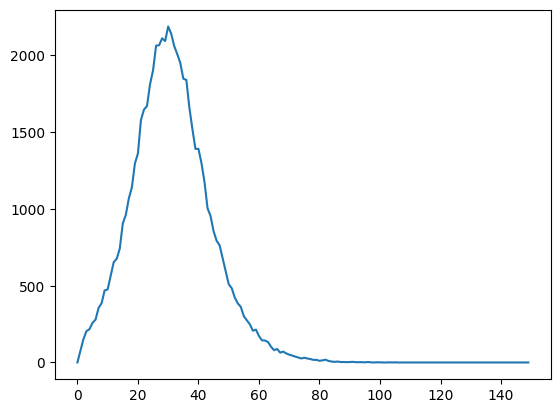

In [34]:
beta = 0.2 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected
print('R_0 = ', beta/delta)

res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=init_rec_frac)
plt.plot(res.daily_incidence)

### Dataset with intervals

In [3]:
tmax = 150 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 'init_inf_frac', 'alpha']+ \
    ['incidence_' + str(day_index) for day_index in range(tmax)] + \
    ['low_incidence_' + str(day_index) for day_index in range(tmax)] + \
    ['high_incidence_' + str(day_index) for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

In [34]:


beta = 0.5 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected

alpha = 0.95
beta = 0.1
daily_incidence = np.array(network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=(1-alpha)).daily_incidence)
np.savetxt('../data/incidence_synthetic_curve.csv', daily_incidence, fmt='%d')

In [4]:
network_model = SEIRNetworkModel(10**5)

beta = 0.5 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected

alpha_arr = np.arange(0.2, 1, 0.01) # fraction of initial non-immune array
beta_arr = np.arange(0.1, 1, 0.01) # transmission rate array

num_runs = 10

print('Dataset size:', len(alpha_arr)*len(beta_arr))

for beta in tqdm.tqdm(beta_arr):
    for alpha in alpha_arr:
        daily_incidence_arr = []
        for _ in range(num_runs):
            daily_incidence = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=(1-alpha)).daily_incidence
            daily_incidence_arr.append(daily_incidence)
        daily_incidence_arr = np.array(daily_incidence_arr)
        # print(daily_incidence_arr.shape)
        mean_daily_incidence = list(np.mean(daily_incidence_arr, axis=0))
        low_daily_incidence = list(np.min(daily_incidence_arr, axis=0))
        high_daily_incidence = list(np.max(daily_incidence_arr, axis=0))
        sample = [beta, gamma, delta, init_inf_frac, alpha] + \
            mean_daily_incidence + low_daily_incidence + high_daily_incidence
        dataset.loc[len(dataset)] = sample
    dataset.to_csv(r'../data/network_model_interval_dataset_{}.csv'.format(len(alpha_arr)*len(beta_arr)))

Dataset size: 7200


100%|██████████| 90/90 [74:52:55<00:00, 2995.28s/it]   


In [ ]:
dataset.to_csv(r'../data/network_model_interval_dataset_{}.csv'.format(len(alpha_arr)*len(beta_arr)))

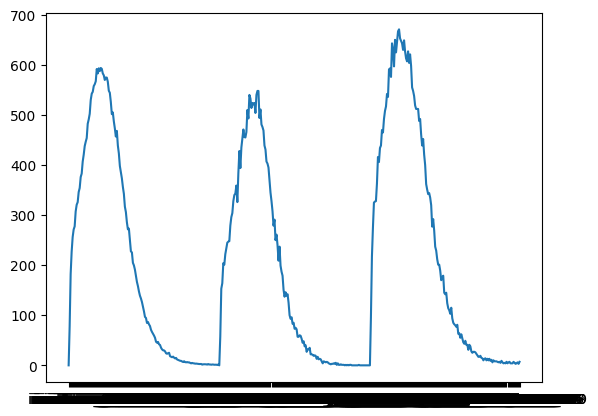

In [60]:
ts = dataset.iloc[20]
ts = ts[5:]
plt.plot(ts)